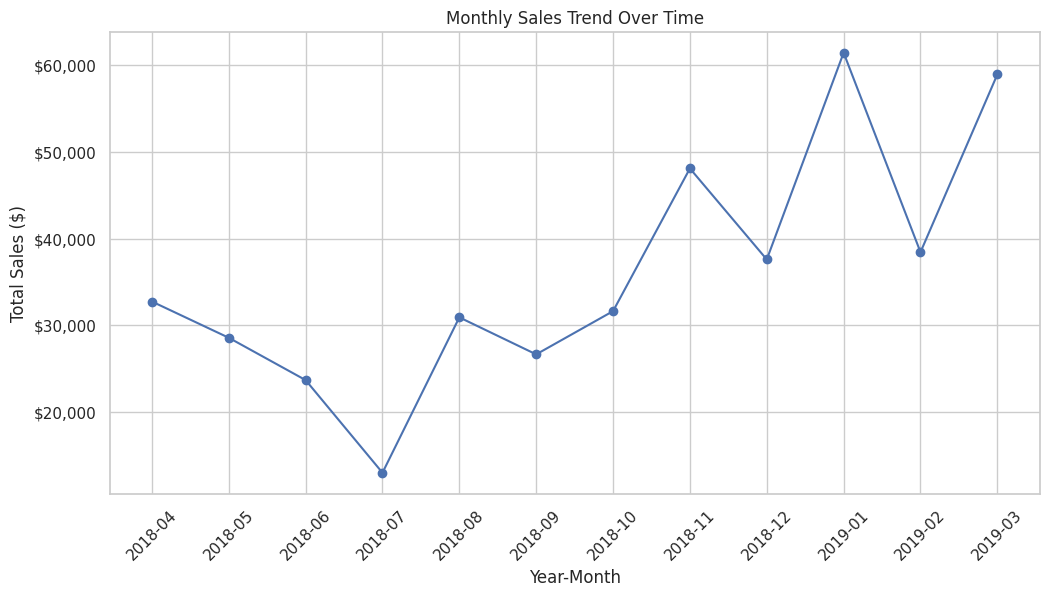

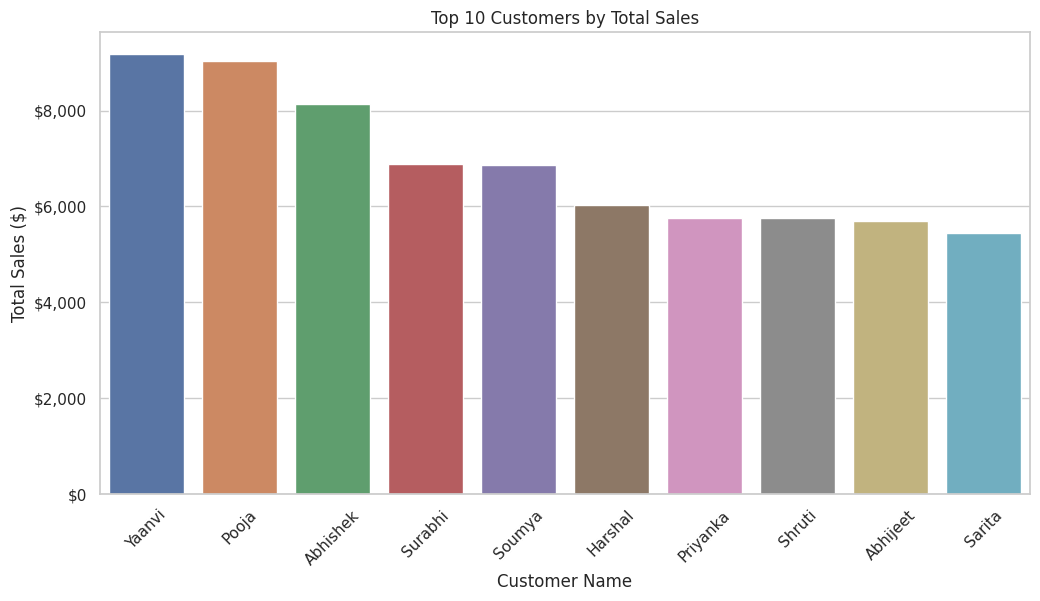

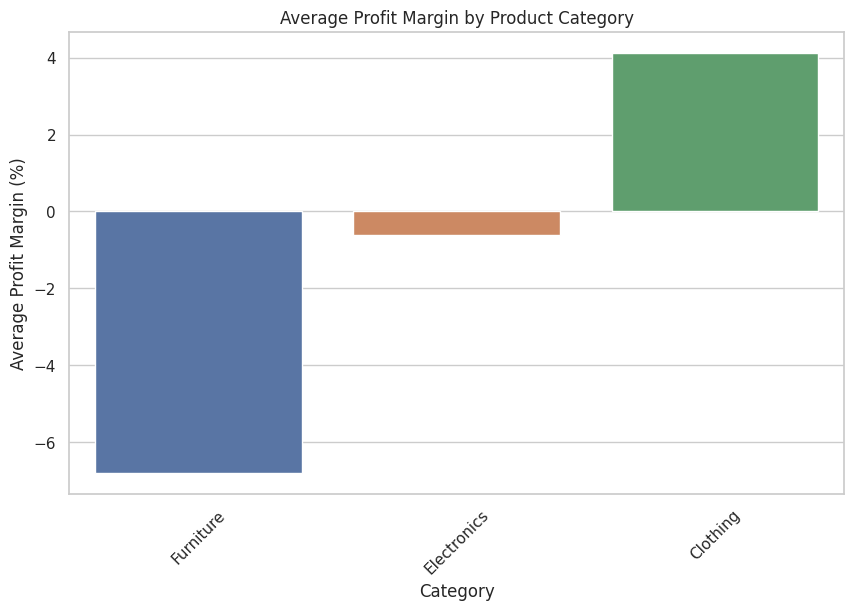

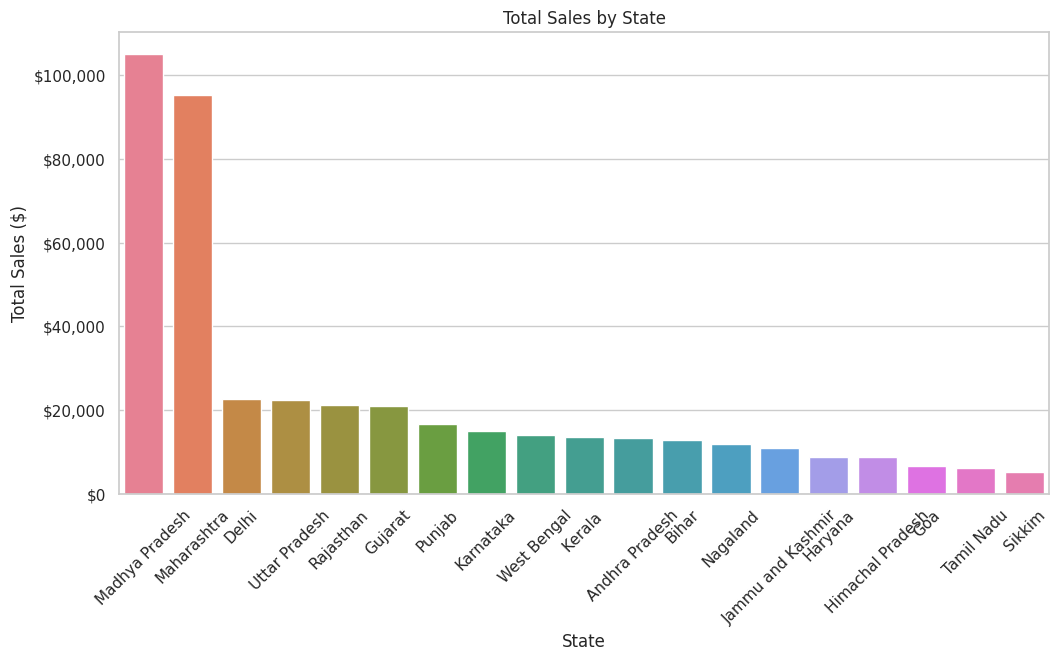

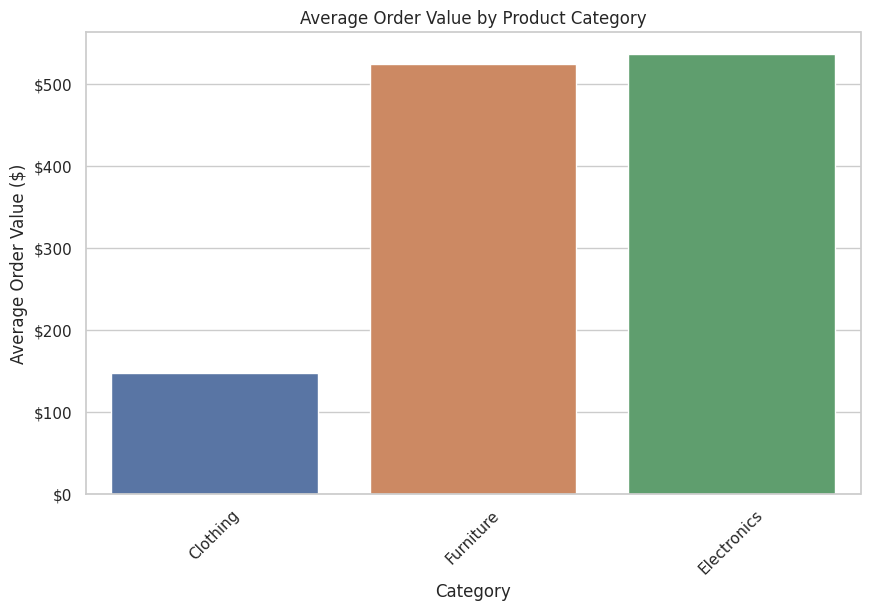

Key Insights:
Total Sales: $431,502.00
Total Profit: $23,955.00
Average Order Value: $281.36
Highest Sales State: Madhya Pradesh with $105,140.00 in sales
Category with Highest Average Order Value: Electronics with $536.58


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Set Seaborn style
sns.set(style="whitegrid")
# Load the datasets
orders_df = pd.read_csv("/content/List of Orders.csv")
order_details_df = pd.read_csv("/content/Order Details.csv")
# Merge the datasets on Order ID
merged_df = pd.merge(order_details_df, orders_df, on="Order ID")

# Convert Order Date to datetime format, handling multiple date formats
merged_df["Order Date"] = pd.to_datetime(merged_df["Order Date"], errors='coerce', dayfirst=True)
merged_df.dropna(subset=["Order Date"], inplace=True)  # Drop rows with invalid dates
merged_df["Year-Month"] = merged_df["Order Date"].dt.to_period("M")

# Aggregate data at the customer level
customer_df = merged_df.groupby("CustomerName").agg(
    Total_Sales=("Amount", "sum"),
    Total_Profit=("Profit", "sum"),
    Total_Quantity=("Quantity", "sum"),
    Order_Count=("Order ID", "nunique"),
    Avg_Order_Value=("Amount", "mean")
).reset_index()

# Handle missing values (if any)
customer_df.fillna(0, inplace=True)

# Sales trends over time
monthly_sales = merged_df.groupby("Year-Month")[["Amount"]].sum()
monthly_sales = monthly_sales.sort_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales["Amount"].values, marker='o', color='b')
plt.xlabel("Year-Month")
plt.ylabel("Total Sales ($)")
plt.title("Monthly Sales Trend Over Time")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.show()

# Top 10 customers by total sales
top_customers = customer_df.sort_values(by="Total_Sales", ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers["CustomerName"], y=top_customers["Total_Sales"], hue=top_customers["CustomerName"], dodge=False)
plt.xlabel("Customer Name")
plt.ylabel("Total Sales ($)")
plt.title("Top 10 Customers by Total Sales")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.legend([], [], frameon=False)
plt.show()

# Profit margin analysis
merged_df["Profit Margin"] = (merged_df["Profit"] / merged_df["Amount"]) * 100
category_profit = merged_df.groupby("Category")["Profit Margin"].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_profit.index, y=category_profit.values, hue=category_profit.index, dodge=False)
plt.xlabel("Category")
plt.ylabel("Average Profit Margin (%)")
plt.title("Average Profit Margin by Product Category")
plt.xticks(rotation=45)
plt.show()

# Sales distribution by state
state_sales = merged_df.groupby("State")["Amount"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=state_sales.index, y=state_sales.values, hue=state_sales.index, dodge=False)
plt.xlabel("State")
plt.ylabel("Total Sales ($)")
plt.title("Total Sales by State")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.show()

# Average order value by category
category_avg_order = merged_df.groupby("Category")["Amount"].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_avg_order.index, y=category_avg_order.values, hue=category_avg_order.index, dodge=False)
plt.xlabel("Category")
plt.ylabel("Average Order Value ($)")
plt.title("Average Order Value by Product Category")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.show()

# Display key insights
print("Key Insights:")
print(f"Total Sales: ${merged_df['Amount'].sum():,.2f}")
print(f"Total Profit: ${merged_df['Profit'].sum():,.2f}")
print(f"Average Order Value: ${customer_df['Avg_Order_Value'].mean():,.2f}")
print(f"Highest Sales State: {state_sales.idxmax()} with ${state_sales.max():,.2f} in sales")
print(f"Category with Highest Average Order Value: {category_avg_order.idxmax()} with ${category_avg_order.max():,.2f}")


